In [ ]:
!pip install torch torchvision scikit-learn matplotlib numpy

# Using a Homemade Transformer

Using device: cuda


100%|██████████| 170M/170M [00:03<00:00, 49.0MB/s]
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(



=== Training CNN ===
Epoch [1/10] Train Loss: 1.4673 | Train Acc: 0.4626 || Val Loss: 1.1042 | Val Acc: 0.5934
Epoch [2/10] Train Loss: 1.0939 | Train Acc: 0.6105 || Val Loss: 0.8899 | Val Acc: 0.6867
Epoch [3/10] Train Loss: 0.9634 | Train Acc: 0.6595 || Val Loss: 0.8888 | Val Acc: 0.6906
Epoch [4/10] Train Loss: 0.8830 | Train Acc: 0.6914 || Val Loss: 0.7342 | Val Acc: 0.7431
Epoch [5/10] Train Loss: 0.8358 | Train Acc: 0.7098 || Val Loss: 0.7044 | Val Acc: 0.7543
Epoch [6/10] Train Loss: 0.7854 | Train Acc: 0.7270 || Val Loss: 0.6708 | Val Acc: 0.7679
Epoch [7/10] Train Loss: 0.7416 | Train Acc: 0.7439 || Val Loss: 0.6584 | Val Acc: 0.7732
Epoch [8/10] Train Loss: 0.7088 | Train Acc: 0.7568 || Val Loss: 0.6485 | Val Acc: 0.7738
Epoch [9/10] Train Loss: 0.6752 | Train Acc: 0.7659 || Val Loss: 0.6180 | Val Acc: 0.7838
Epoch [10/10] Train Loss: 0.6514 | Train Acc: 0.7747 || Val Loss: 0.5844 | Val Acc: 0.8028
CNN training complete in 167.38 seconds; Total Params: 2474506


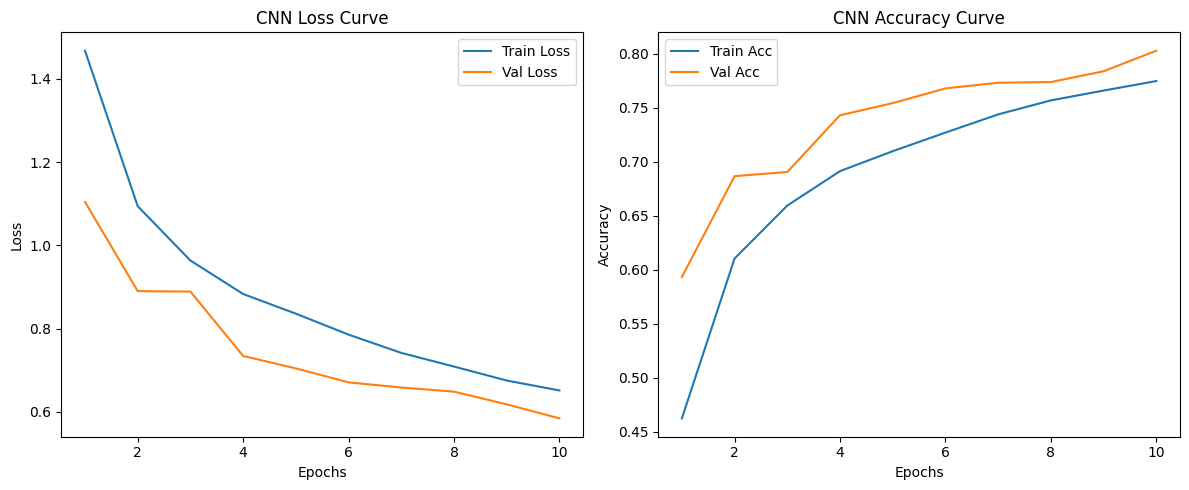


Classification Report for CNN:

              precision    recall  f1-score   support

    airplane       0.82      0.81      0.81      1000
  automobile       0.95      0.84      0.90      1000
        bird       0.79      0.65      0.71      1000
         cat       0.64      0.65      0.65      1000
        deer       0.69      0.87      0.77      1000
         dog       0.74      0.70      0.72      1000
        frog       0.89      0.83      0.86      1000
       horse       0.82      0.87      0.84      1000
        ship       0.86      0.90      0.88      1000
       truck       0.86      0.90      0.88      1000

    accuracy                           0.80     10000
   macro avg       0.81      0.80      0.80     10000
weighted avg       0.81      0.80      0.80     10000



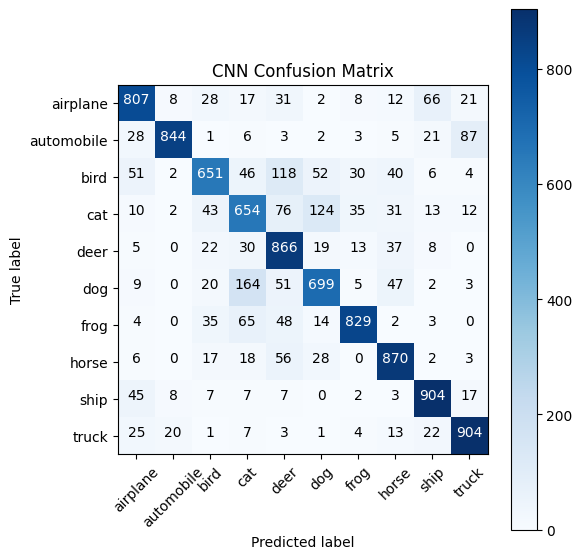


=== Training ViT ===
Epoch [1/10] Train Loss: 1.7398 | Train Acc: 0.3474 || Val Loss: 1.4595 | Val Acc: 0.4592
Epoch [2/10] Train Loss: 1.3543 | Train Acc: 0.5070 || Val Loss: 1.2862 | Val Acc: 0.5270
Epoch [3/10] Train Loss: 1.2008 | Train Acc: 0.5623 || Val Loss: 1.1653 | Val Acc: 0.5777
Epoch [4/10] Train Loss: 1.1020 | Train Acc: 0.6029 || Val Loss: 1.0850 | Val Acc: 0.6070
Epoch [5/10] Train Loss: 1.0308 | Train Acc: 0.6286 || Val Loss: 1.0085 | Val Acc: 0.6412
Epoch [6/10] Train Loss: 0.9694 | Train Acc: 0.6505 || Val Loss: 0.9329 | Val Acc: 0.6695
Epoch [7/10] Train Loss: 0.9259 | Train Acc: 0.6705 || Val Loss: 0.9365 | Val Acc: 0.6697
Epoch [8/10] Train Loss: 0.8857 | Train Acc: 0.6848 || Val Loss: 0.8842 | Val Acc: 0.6875
Epoch [9/10] Train Loss: 0.8492 | Train Acc: 0.6975 || Val Loss: 0.9217 | Val Acc: 0.6762
Epoch [10/10] Train Loss: 0.8224 | Train Acc: 0.7075 || Val Loss: 0.8363 | Val Acc: 0.7106
ViT training complete in 229.67 seconds; Total Params: 811146


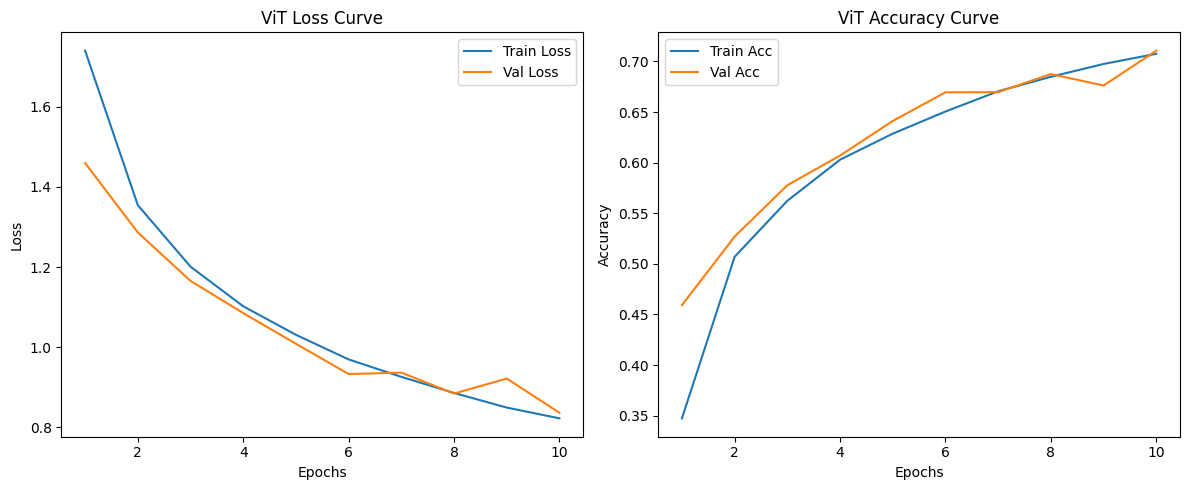


Classification Report for ViT:

              precision    recall  f1-score   support

    airplane       0.67      0.80      0.73      1000
  automobile       0.85      0.81      0.83      1000
        bird       0.67      0.59      0.63      1000
         cat       0.58      0.43      0.49      1000
        deer       0.72      0.57      0.64      1000
         dog       0.58      0.67      0.62      1000
        frog       0.77      0.81      0.79      1000
       horse       0.65      0.82      0.73      1000
        ship       0.83      0.82      0.83      1000
       truck       0.80      0.78      0.79      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000



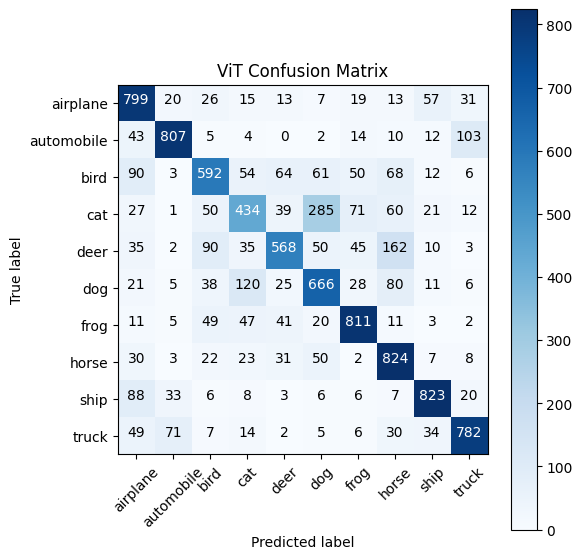


--- Summary Comparison ---
CNN: Params = 2474506 , Training Time = 167.38 sec, Best Val Accuracy = 80.28%
ViT: Params = 811146 , Training Time = 229.67 sec, Best Val Accuracy = 71.06%

Analysis:
1. CNNs have long been the standard for small-scale image classification tasks like CIFAR-10. They often train faster and have fewer parameters when well-designed for the given resolution. BatchNorm and Dropout help in stabilizing training and avoiding overfitting. 

2. Vision Transformers (ViT) follow a very different approach by splitting images into patches and applying transformer-based self-attention. Although state-of-the-art on large datasets, for smaller datasets such as CIFAR-10, ViTs may require more careful tuning or additional data augmentation to reach competitive performance. They also may have a larger parameter count and longer training time, depending on configuration. 

3. In this experiment, compare training/validation curves, final accuracy, and resource requirements. Your 

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import transforms, datasets
from torch.utils.data import DataLoader, Subset
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import itertools

# -------------------------------
# Device configuration
# -------------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# -------------------------------
# Hyperparameters and Flags
# -------------------------------

# Training parameters
num_epochs = 10             # Limit epochs to keep training time practical.
batch_size = 128            # A typical mini-batch size balancing speed and memory.
learning_rate = 0.001       # Standard learning rate for Adam.

# Optional: restrict CIFAR-10 to a subset of classes (e.g., cat and dog) for faster training
USE_SUBSET = False          # Set True to restrict dataset.
SUBSET_CLASSES = ['cat', 'dog']  # Valid CIFAR-10 class names.

# -------------------------------
# Data Preparation
# -------------------------------

# Define standard transformations: normalization based on CIFAR-10 statistics,
# random horizontal flips (for data augmentation), and conversion to tensor.
transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465],
                         std=[0.2470, 0.2435, 0.2616])
])
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465],
                         std=[0.2470, 0.2435, 0.2616])
])

# Download CIFAR-10 training and test datasets
train_dataset = datasets.CIFAR10(root='./data', train=True,
                                 download=True, transform=transform_train)
test_dataset = datasets.CIFAR10(root='./data', train=False,
                                download=True, transform=transform_test)

# If using a subset, filter the datasets to only the target classes.
def filter_dataset(dataset, target_classes):
    # Build mapping from class name to label index.
    class_to_idx = {cls: idx for idx, cls in enumerate(dataset.classes)}
    target_indices = [class_to_idx[c] for c in target_classes]
    # Get indices of examples that belong to the target classes.
    indices = [i for i, (_, label) in enumerate(dataset) if label in target_indices]
    return Subset(dataset, indices)

if USE_SUBSET:
    train_dataset = filter_dataset(train_dataset, SUBSET_CLASSES)
    test_dataset = filter_dataset(test_dataset, SUBSET_CLASSES)
    print(f"Dataset restricted to classes: {SUBSET_CLASSES}")

# Create data loaders.
train_loader = DataLoader(train_dataset, batch_size=batch_size,
                          shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=batch_size,
                         shuffle=False, num_workers=2)

# -------------------------------
# Model Definitions
# -------------------------------

# 1. A simple CNN with best practices: BatchNorm, Dropout, ReLU, etc.
class SimpleCNN(nn.Module):
    def __init__(self, num_classes=10):
        super(SimpleCNN, self).__init__()
        # Features extractor: three conv blocks with BatchNorm, ReLU activation and pooling.
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),  # Input: 3 x 32 x 32 → 64 x 32 x 32
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2),                             # 64 x 16 x 16

            nn.Conv2d(64, 128, kernel_size=3, padding=1), # 128 x 16 x 16
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2),                             # 128 x 8 x 8

            nn.Conv2d(128, 256, kernel_size=3, padding=1),# 256 x 8 x 8
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(2),                             # 256 x 4 x 4
        )
        # Classifier: Dropout to reduce overfitting and fully-connected layers.
        self.classifier = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(256 * 4 * 4, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        # Flatten feature maps into a vector.
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

# 2. A minimal Vision Transformer (ViT) model based on the original paper components.
class VisionTransformer(nn.Module):
    def __init__(self, image_size=32, patch_size=4, num_classes=10,
                 embed_dim=128, depth=6, num_heads=4, mlp_dim=256, dropout_rate=0.1):
        """
        image_size: size of input image (32 for CIFAR-10)
        patch_size: size of each patch (4 → 8x8 patches; total patches = (32/4)^2 = 64)
        embed_dim: output dimension for patch embeddings
        depth: number of transformer encoder layers
        num_heads: number of heads in multi-head attention
        mlp_dim: dimension in the hidden layer of the feed-forward network inside transformer layers
        dropout_rate: dropout rate throughout the model
        """
        super(VisionTransformer, self).__init__()
        self.patch_size = patch_size
        self.num_patches = (image_size // patch_size) ** 2
        self.embed_dim = embed_dim

        # 1. Patch Embedding: using a convolution where the kernel size and stride equals the patch size.
        self.patch_embed = nn.Conv2d(in_channels=3, out_channels=embed_dim,
                                     kernel_size=patch_size, stride=patch_size)
        # 2. Class token: a learnable parameter prepended to the patch tokens.
        self.cls_token = nn.Parameter(torch.zeros(1, 1, embed_dim))
        # 3. Positional Embedding: learnable positional embedding for each patch + class token.
        self.pos_embed = nn.Parameter(torch.zeros(1, self.num_patches + 1, embed_dim))
        self.dropout = nn.Dropout(dropout_rate)

        # 4. Transformer Encoder: using PyTorch's implementation.
        encoder_layer = nn.TransformerEncoderLayer(d_model=embed_dim, nhead=num_heads,
                                                   dim_feedforward=mlp_dim, dropout=dropout_rate)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=depth)

        # 5. Classification head: a normalization layer and a linear classifier.
        self.norm = nn.LayerNorm(embed_dim)
        self.head = nn.Linear(embed_dim, num_classes)

        # Initialize class and positional tokens.
        self._init_weights()

    def _init_weights(self):
        # Initialize the positional and class tokens with a truncated normal distribution.
        nn.init.trunc_normal_(self.pos_embed, std=0.02)
        nn.init.trunc_normal_(self.cls_token, std=0.02)
        # The rest of the layers use PyTorch's default initialization.

    def forward(self, x):
        B = x.shape[0]
        # Create patch embeddings.
        # Input x: (B, 3, 32, 32) → patch_embed(x): (B, embed_dim, 8, 8)
        x = self.patch_embed(x)
        # Flatten the patches: (B, embed_dim, num_patches)
        x = x.flatten(2)
        # Transpose: (B, num_patches, embed_dim)
        x = x.transpose(1, 2)

        # Expand the class token for each sample and concatenate.
        cls_tokens = self.cls_token.expand(B, -1, -1)   # (B, 1, embed_dim)
        x = torch.cat((cls_tokens, x), dim=1)             # (B, num_patches+1, embed_dim)

        # Add positional embeddings.
        x = x + self.pos_embed
        x = self.dropout(x)

        # Transformer expects input shape (seq_length, batch, embed_dim).
        x = x.transpose(0, 1)
        x = self.transformer(x)
        # Retrieve the class token (first token).
        x = x[0]
        x = self.norm(x)
        x = self.head(x)
        return x

# -------------------------------
# Training and Evaluation Functions
# -------------------------------

def train_one_epoch(model, optimizer, criterion, dataloader):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for images, labels in dataloader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        # Compute the number of correctly predicted samples.
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()
    epoch_loss = running_loss / total
    epoch_acc = correct / total
    return epoch_loss, epoch_acc

def validate(model, criterion, dataloader):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    # We collect all predictions and labels for confusion matrix and F1-score later.
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            running_loss += loss.item() * images.size(0)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    epoch_loss = running_loss / total
    epoch_acc = correct / total
    return epoch_loss, epoch_acc, np.array(all_labels), np.array(all_preds)

def plot_curves(train_losses, val_losses, train_accs, val_accs, model_name):
    epochs = range(1, len(train_losses)+1)
    plt.figure(figsize=(12,5))

    # Loss curve
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label="Train Loss")
    plt.plot(epochs, val_losses, label="Val Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title(f"{model_name} Loss Curve")
    plt.legend()

    # Accuracy curve
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accs, label="Train Acc")
    plt.plot(epochs, val_accs, label="Val Acc")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title(f"{model_name} Accuracy Curve")
    plt.legend()

    plt.tight_layout()
    plt.show()

def plot_confusion_matrix(cm, classes, model_name, normalize=False):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / (cm.sum(axis=1)[:, np.newaxis] + 1e-8)

    plt.figure(figsize=(6,6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f"{model_name} Confusion Matrix")
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

# -------------------------------
# Experiment Runner Function
# -------------------------------
def run_experiment(model, model_name, num_epochs, train_loader, test_loader):
    model.to(device)
    # Use Adam optimizer and CrossEntropy loss
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    criterion = nn.CrossEntropyLoss()

    train_losses, train_accs = [], []
    val_losses, val_accs = [], []
    start_time = time.time()

    print(f"\n=== Training {model_name} ===")
    for epoch in range(num_epochs):
        t_loss, t_acc = train_one_epoch(model, optimizer, criterion, train_loader)
        v_loss, v_acc, all_labels, all_preds = validate(model, criterion, test_loader)
        train_losses.append(t_loss)
        train_accs.append(t_acc)
        val_losses.append(v_loss)
        val_accs.append(v_acc)

        print(f"Epoch [{epoch+1}/{num_epochs}] "
              f"Train Loss: {t_loss:.4f} | Train Acc: {t_acc:.4f} || "
              f"Val Loss: {v_loss:.4f} | Val Acc: {v_acc:.4f}")

    total_time = time.time() - start_time
    params_count = sum(p.numel() for p in model.parameters() if p.requires_grad)
    print(f"{model_name} training complete in {total_time:.2f} seconds; Total Params: {params_count}")

    # Plot training curves.
    plot_curves(train_losses, val_losses, train_accs, val_accs, model_name)

    # Compute confusion matrix and F1-score on validation/test set.
    cm = confusion_matrix(all_labels, all_preds)
    print(f"\nClassification Report for {model_name}:\n")
    print(classification_report(all_labels, all_preds, target_names=train_dataset.classes if not USE_SUBSET else SUBSET_CLASSES))
    plot_confusion_matrix(cm, classes=(train_dataset.classes if not USE_SUBSET else SUBSET_CLASSES), model_name=model_name)

    # Return metrics for comparison later.
    return {
        "train_losses": train_losses,
        "train_accs": train_accs,
        "val_losses": val_losses,
        "val_accs": val_accs,
        "training_time": total_time,
        "params": params_count
    }

# -------------------------------
# Main: Run experiments for both models
# -------------------------------
if __name__ == "__main__":
    # Determine number of classes
    if USE_SUBSET:
        num_classes = len(SUBSET_CLASSES)
    else:
        num_classes = 10

    # Instantiate models.
    cnn_model = SimpleCNN(num_classes=num_classes)
    vit_model = VisionTransformer(image_size=32, patch_size=4, num_classes=num_classes,
                                  embed_dim=128, depth=6, num_heads=4, mlp_dim=256, dropout_rate=0.1)

    # Run experiments for CNN.
    cnn_metrics = run_experiment(cnn_model, "CNN", num_epochs, train_loader, test_loader)

    # Run experiments for ViT.
    vit_metrics = run_experiment(vit_model, "ViT", num_epochs, train_loader, test_loader)

    # -------------------------------
    # Analysis and Comparison
    # -------------------------------
    print("\n--- Summary Comparison ---")
    print(f"CNN: Params = {cnn_metrics['params']} , Training Time = {cnn_metrics['training_time']:.2f} sec, Best Val Accuracy = {max(cnn_metrics['val_accs'])*100:.2f}%")
    print(f"ViT: Params = {vit_metrics['params']} , Training Time = {vit_metrics['training_time']:.2f} sec, Best Val Accuracy = {max(vit_metrics['val_accs'])*100:.2f}%")

    print("\nAnalysis:")
    print("1. CNNs have long been the standard for small-scale image classification tasks like CIFAR-10. They often train faster and "
          "have fewer parameters when well-designed for the given resolution. BatchNorm and Dropout help in stabilizing training "
          "and avoiding overfitting. \n")
    print("2. Vision Transformers (ViT) follow a very different approach by splitting images into patches and applying transformer-based "
          "self-attention. Although state-of-the-art on large datasets, for smaller datasets such as CIFAR-10, ViTs may require more careful "
          "tuning or additional data augmentation to reach competitive performance. They also may have a larger parameter count and longer training time, "
          "depending on configuration. \n")
    print("3. In this experiment, compare training/validation curves, final accuracy, and resource requirements. Your findings can inform "
          "which architecture might be more efficient or effective under constrained data and compute scenarios.\n")


## Using Fined Tuned Transformer

Using device: cuda


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/22.9M [00:00<?, ?B/s]


Running experiment for CNN model...

=== Training CNN ===
Epoch [1/10]  Train Loss: 1.5160, Train Acc: 0.4518 || Val Loss: 1.1174, Val Acc: 0.6022
Epoch [2/10]  Train Loss: 1.1127, Train Acc: 0.6059 || Val Loss: 0.9580, Val Acc: 0.6459
Epoch [3/10]  Train Loss: 0.9770, Train Acc: 0.6568 || Val Loss: 0.9112, Val Acc: 0.6784
Epoch [4/10]  Train Loss: 0.8982, Train Acc: 0.6889 || Val Loss: 0.8186, Val Acc: 0.7155
Epoch [5/10]  Train Loss: 0.8433, Train Acc: 0.7063 || Val Loss: 0.6895, Val Acc: 0.7614
Epoch [6/10]  Train Loss: 0.7971, Train Acc: 0.7238 || Val Loss: 0.6881, Val Acc: 0.7649
Epoch [7/10]  Train Loss: 0.7620, Train Acc: 0.7356 || Val Loss: 0.6699, Val Acc: 0.7689
Epoch [8/10]  Train Loss: 0.7280, Train Acc: 0.7489 || Val Loss: 0.6302, Val Acc: 0.7832
Epoch [9/10]  Train Loss: 0.6936, Train Acc: 0.7596 || Val Loss: 0.6115, Val Acc: 0.7913
Epoch [10/10]  Train Loss: 0.6644, Train Acc: 0.7689 || Val Loss: 0.6543, Val Acc: 0.7792
CNN training complete in 172.97 sec; Total Params:

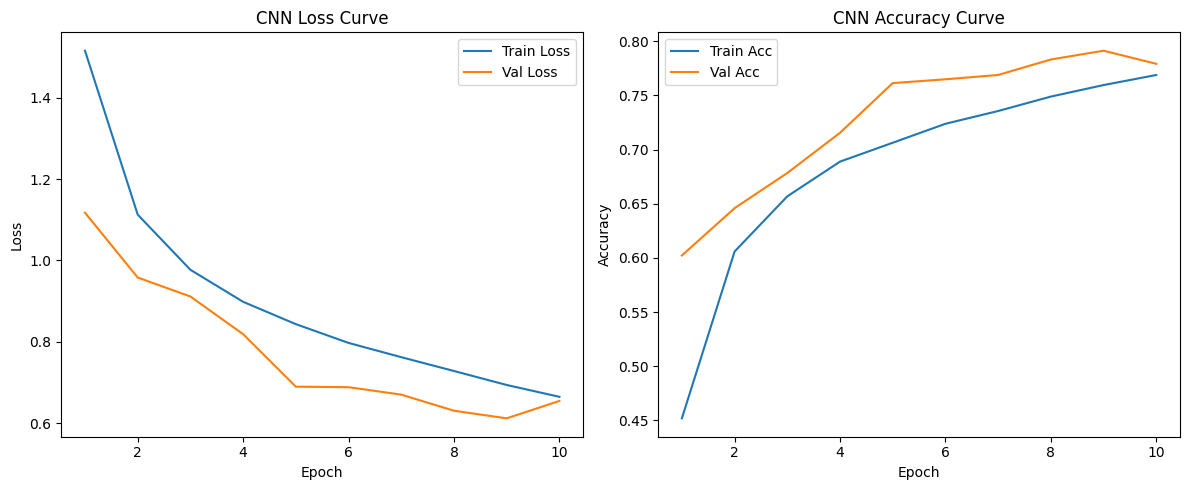


Classification Report for CNN:

              precision    recall  f1-score   support

    airplane       0.72      0.82      0.77      1000
  automobile       0.93      0.88      0.91      1000
        bird       0.76      0.60      0.67      1000
         cat       0.62      0.60      0.61      1000
        deer       0.74      0.78      0.76      1000
         dog       0.83      0.58      0.68      1000
        frog       0.83      0.85      0.84      1000
       horse       0.82      0.83      0.83      1000
        ship       0.74      0.94      0.83      1000
       truck       0.83      0.90      0.86      1000

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.78     10000
weighted avg       0.78      0.78      0.78     10000



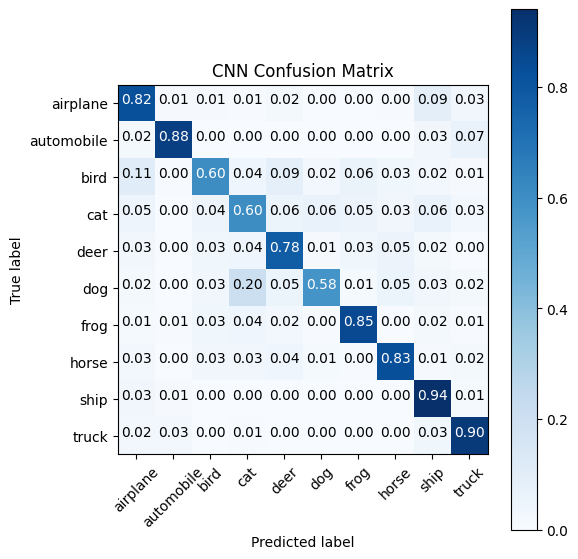


Running experiment for Pre-trained ViT model...

=== Training Pre-trained ViT ===
Epoch [1/10]  Train Loss: 1.7680, Train Acc: 0.3392 || Val Loss: 1.2866, Val Acc: 0.5312
Epoch [2/10]  Train Loss: 1.1113, Train Acc: 0.5963 || Val Loss: 0.9787, Val Acc: 0.6501
Epoch [3/10]  Train Loss: 0.8859, Train Acc: 0.6826 || Val Loss: 0.8576, Val Acc: 0.6947
Epoch [4/10]  Train Loss: 0.7425, Train Acc: 0.7354 || Val Loss: 0.7394, Val Acc: 0.7400
Epoch [5/10]  Train Loss: 0.6471, Train Acc: 0.7716 || Val Loss: 0.6852, Val Acc: 0.7604
Epoch [6/10]  Train Loss: 0.5775, Train Acc: 0.7955 || Val Loss: 0.6374, Val Acc: 0.7743
Epoch [7/10]  Train Loss: 0.5046, Train Acc: 0.8233 || Val Loss: 0.5820, Val Acc: 0.7987
Epoch [8/10]  Train Loss: 0.4644, Train Acc: 0.8365 || Val Loss: 0.5547, Val Acc: 0.8054
Epoch [9/10]  Train Loss: 0.4197, Train Acc: 0.8518 || Val Loss: 0.5294, Val Acc: 0.8115
Epoch [10/10]  Train Loss: 0.3807, Train Acc: 0.8646 || Val Loss: 0.6202, Val Acc: 0.7973
Pre-trained ViT training c

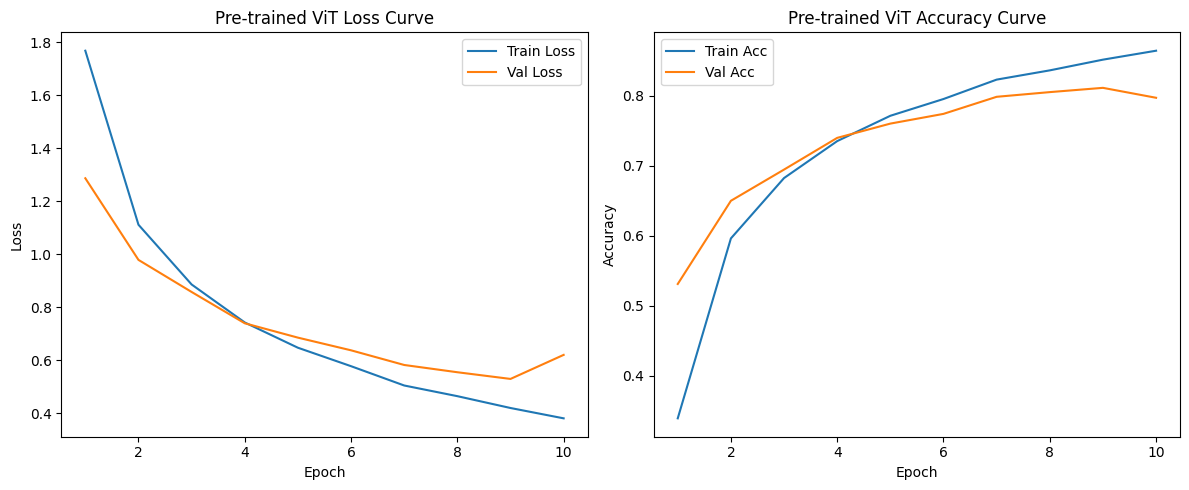


Classification Report for Pre-trained ViT:

              precision    recall  f1-score   support

    airplane       0.70      0.92      0.79      1000
  automobile       0.89      0.91      0.90      1000
        bird       0.77      0.74      0.75      1000
         cat       0.77      0.52      0.62      1000
        deer       0.73      0.84      0.78      1000
         dog       0.71      0.77      0.74      1000
        frog       0.96      0.71      0.82      1000
       horse       0.75      0.91      0.82      1000
        ship       0.92      0.81      0.86      1000
       truck       0.89      0.85      0.87      1000

    accuracy                           0.80     10000
   macro avg       0.81      0.80      0.80     10000
weighted avg       0.81      0.80      0.80     10000



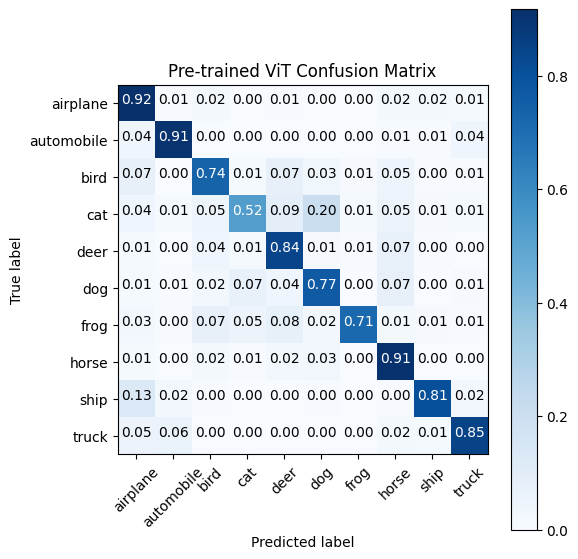


--- Summary Comparison ---
CNN: Params = 2474506, Training Time = 172.97 sec, Best Val Acc = 79.13%
ViT: Params = 5526346, Training Time = 2069.04 sec, Best Val Acc = 81.15%

Analysis:
1. CNNs have been the workhorse for small-scale image classification tasks such as CIFAR-10. Their architecture often leads to faster training and requires fewer parameters when designed appropriately for the input resolution (32x32).
2. Pre-trained ViTs, despite being designed for larger-scale datasets like ImageNet, can be fine-tuned on CIFAR-10 by resizing the input images to the expected 224x224 resolution. However, this resizing may introduce artifacts, and the ViT’s capacity may be under-utilized on small images. They often have a larger parameter count and longer training time when fine-tuning on a small dataset.
3. In practice, for small-scale tasks, a well-designed CNN might train faster and yield competitive performance, whereas a ViT might require more careful fine-tuning and data augmentatio

In [2]:
import time
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix, classification_report
import itertools
import timm  # For pre-trained ViT models

# -------------------------------
# Device configuration: use GPU if available.
# -------------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# -------------------------------
# Hyperparameters and Training Settings
# -------------------------------
num_epochs = 10              # Keeping training epochs low to ensure practical training time.
batch_size = 128             # Typical batch size balancing convergence speed and memory use.
learning_rate = 0.001        # Chosen for stability with the Adam optimizer.
num_classes = 10             # CIFAR-10 has 10 classes.

# -------------------------------
# Data Preparation: Two Pipelines for CNN and ViT
# -------------------------------
# For the CNN: use CIFAR-10 native resolution (32x32) and normalization.
transform_cnn_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),         # Data augmentation.
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465],
                         std=[0.2470, 0.2435, 0.2616])
])
transform_cnn_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465],
                         std=[0.2470, 0.2435, 0.2616])
])

# For the pre-trained ViT: resize images to 224x224 as expected by ImageNet pretrained models.
# Use ImageNet normalization parameters.
transform_vit_train = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),         # Data augmentation.
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])
transform_vit_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# Load CIFAR-10 datasets with the two sets of transforms.
train_dataset_cnn = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_cnn_train)
test_dataset_cnn = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_cnn_test)

train_dataset_vit = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_vit_train)
test_dataset_vit = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_vit_test)

# Create DataLoaders.
train_loader_cnn = DataLoader(train_dataset_cnn, batch_size=batch_size, shuffle=True, num_workers=2)
test_loader_cnn = DataLoader(test_dataset_cnn, batch_size=batch_size, shuffle=False, num_workers=2)

train_loader_vit = DataLoader(train_dataset_vit, batch_size=batch_size, shuffle=True, num_workers=2)
test_loader_vit = DataLoader(test_dataset_vit, batch_size=batch_size, shuffle=False, num_workers=2)

# -------------------------------
# Model Definitions
# -------------------------------
# 1. Custom CNN Model with Best Practices (BatchNorm, Dropout, ReLU)
class SimpleCNN(nn.Module):
    def __init__(self, num_classes=10):
        super(SimpleCNN, self).__init__()
        # Features extractor: Three convolutional blocks.
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),   # (B,3,32,32) -> (B,64,32,32)
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2),                              # (B,64,16,16)

            nn.Conv2d(64, 128, kernel_size=3, padding=1),  # (B,128,16,16)
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2),                              # (B,128,8,8)

            nn.Conv2d(128, 256, kernel_size=3, padding=1), # (B,256,8,8)
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(2),                              # (B,256,4,4)
        )
        # Classifier with Dropout to reduce overfitting.
        self.classifier = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(256 * 4 * 4, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        # Flatten feature maps.
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

# 2. Pre-trained Vision Transformer (ViT) from timm.
# We use 'vit_tiny_patch16_224' as a small ViT model which is pretrained on ImageNet.
vit_model = timm.create_model('vit_tiny_patch16_224', pretrained=True, num_classes=num_classes)

# -------------------------------
# Helper Functions for Training and Evaluation
# -------------------------------
def train_one_epoch(model, optimizer, criterion, dataloader):
    model.train()
    running_loss, correct, total = 0.0, 0, 0
    for images, labels in dataloader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()
    epoch_loss = running_loss / total
    epoch_acc = correct / total
    return epoch_loss, epoch_acc

def validate(model, criterion, dataloader):
    model.eval()
    running_loss, correct, total = 0.0, 0, 0
    all_preds, all_labels = [], []
    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * images.size(0)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    epoch_loss = running_loss / total
    epoch_acc = correct / total
    return epoch_loss, epoch_acc, np.array(all_labels), np.array(all_preds)

def plot_curves(train_losses, val_losses, train_accs, val_accs, model_name):
    epochs = range(1, len(train_losses)+1)
    plt.figure(figsize=(12, 5))
    # Loss curve
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label="Train Loss")
    plt.plot(epochs, val_losses, label="Val Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title(f"{model_name} Loss Curve")
    plt.legend()
    # Accuracy curve
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accs, label="Train Acc")
    plt.plot(epochs, val_accs, label="Val Acc")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title(f"{model_name} Accuracy Curve")
    plt.legend()
    plt.tight_layout()
    plt.show()

def plot_confusion_matrix(cm, classes, model_name, normalize=False):
    """Plot and display the confusion matrix."""
    if normalize:
        cm = cm.astype('float') / (cm.sum(axis=1)[:, np.newaxis] + 1e-8)
    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f"{model_name} Confusion Matrix")
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

def run_experiment(model, model_name, num_epochs, train_loader, test_loader, dataset_classes):
    model.to(device)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    criterion = nn.CrossEntropyLoss()

    train_losses, train_accs = [], []
    val_losses, val_accs = [], []
    start_time = time.time()
    print(f"\n=== Training {model_name} ===")
    for epoch in range(num_epochs):
        t_loss, t_acc = train_one_epoch(model, optimizer, criterion, train_loader)
        v_loss, v_acc, all_labels, all_preds = validate(model, criterion, test_loader)
        train_losses.append(t_loss)
        train_accs.append(t_acc)
        val_losses.append(v_loss)
        val_accs.append(v_acc)
        print(f"Epoch [{epoch+1}/{num_epochs}]  Train Loss: {t_loss:.4f}, Train Acc: {t_acc:.4f} || Val Loss: {v_loss:.4f}, Val Acc: {v_acc:.4f}")
    total_time = time.time() - start_time
    params_count = sum(p.numel() for p in model.parameters() if p.requires_grad)
    print(f"{model_name} training complete in {total_time:.2f} sec; Total Params: {params_count}")

    # Plot curves for loss and accuracy.
    plot_curves(train_losses, val_losses, train_accs, val_accs, model_name)

    # Confusion matrix and classification report.
    cm = confusion_matrix(all_labels, all_preds)
    print(f"\nClassification Report for {model_name}:\n")
    print(classification_report(all_labels, all_preds, target_names=dataset_classes))
    plot_confusion_matrix(cm, classes=dataset_classes, model_name=model_name, normalize=True)

    return {
        "train_losses": train_losses,
        "train_accs": train_accs,
        "val_losses": val_losses,
        "val_accs": val_accs,
        "training_time": total_time,
        "params": params_count
    }

# -------------------------------
# Main Experiment: Compare CNN and Pre-trained ViT
# -------------------------------
if __name__ == "__main__":
    # For CIFAR-10, class names are provided by the dataset.
    class_names = train_dataset_cnn.classes

    # Instantiate the CNN model.
    cnn_model = SimpleCNN(num_classes=num_classes)
    print("\nRunning experiment for CNN model...")
    cnn_metrics = run_experiment(cnn_model, "CNN", num_epochs, train_loader_cnn, test_loader_cnn, class_names)

    # For the pre-trained ViT, we are using timm's 'vit_tiny_patch16_224'.
    # Note: The ViT expects images resized to 224x224, and the corresponding data pipeline is used.
    print("\nRunning experiment for Pre-trained ViT model...")
    vit_metrics = run_experiment(vit_model, "Pre-trained ViT", num_epochs, train_loader_vit, test_loader_vit, class_names)

    # -------------------------------
    # Comparison Summary and Analysis
    # -------------------------------
    print("\n--- Summary Comparison ---")
    print(f"CNN: Params = {cnn_metrics['params']}, Training Time = {cnn_metrics['training_time']:.2f} sec, Best Val Acc = {max(cnn_metrics['val_accs'])*100:.2f}%")
    print(f"ViT: Params = {vit_metrics['params']}, Training Time = {vit_metrics['training_time']:.2f} sec, Best Val Acc = {max(vit_metrics['val_accs'])*100:.2f}%\n")

    print("Analysis:")
    print("1. CNNs have been the workhorse for small-scale image classification tasks such as CIFAR-10. Their architecture "
          "often leads to faster training and requires fewer parameters when designed appropriately for the input resolution (32x32).")
    print("2. Pre-trained ViTs, despite being designed for larger-scale datasets like ImageNet, can be fine-tuned on CIFAR-10 by resizing "
          "the input images to the expected 224x224 resolution. However, this resizing may introduce artifacts, and the ViT’s capacity may be "
          "under-utilized on small images. They often have a larger parameter count and longer training time when fine-tuning on a small dataset.")
    print("3. In practice, for small-scale tasks, a well-designed CNN might train faster and yield competitive performance, whereas a ViT might "
          "require more careful fine-tuning and data augmentation to reach similar accuracy levels.")
    print("\nHyperparameter Reasoning:")
    print("- Learning Rate (0.001): Balances convergence speed and stability when using Adam.")
    print("- Batch Size (128): Chosen to efficiently use available memory and provide stable gradient estimates.")
    print("- Epochs (10): Limited to keep training time practical while still observing learning trends.")
